<a href="https://colab.research.google.com/github/tracyhua2/SYS3034-BaseballCase/blob/main/Code/BaseballDraft_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install six

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from six import StringIO
from IPython.display import Image
import pydotplus

player_url = "https://raw.githubusercontent.com/tracyhua2/SYS3034-BaseballCase/refs/heads/main/Data/player_data.csv"
player_data = pd.read_csv(player_url)

weights_url = "https://raw.githubusercontent.com/tracyhua2/SYS3034-BaseballCase/refs/heads/main/Data/metrics_weights.csv"
weights_data = pd.read_csv(weights_url)

team_url = "https://raw.githubusercontent.com/tracyhua2/SYS3034-BaseballCase/refs/heads/main/Data/team_performance.csv"
team_data = pd.read_csv(team_url)

In [4]:
# Drop NAs in weights_data
weights_data = weights_data.dropna()
weights_data.head()

,team_statistic,team_weights,ai_weights,research_weights,normalized_weights
0,AB,0.069507,0.04,0.00,0.036502
1,R,0.084823,0.15,0.10,0.111608
2,H,0.101106,0.08,0.05,0.077035
3,2B,0.054867,0.06,0.00,0.038289
4,3B,0.034097,0.03,0.00,0.021366


In [5]:
# Create copy of player_data
player_df = player_data.copy()

# Change Player column to float
player_df['Player'] = player_df['Player'].str.replace(',', '').astype(float)

player_df.head()

,Player,Player #,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,BA,OBP,SLG
0,6125000.0,1,688,113,204,37,19,16,68,56,15,66,0.297,0.358,0.475
1,18000000.0,2,686,103,213,20,7,6,42,43,4,51,0.310,0.361,0.386
2,4000000.0,3,661,93,186,33,1,8,57,19,6,56,0.281,0.334,0.371
3,1750000.0,4,653,118,213,54,2,17,83,20,1,50,0.326,0.376,0.493
4,13054526.0,5,645,102,183,36,2,12,82,10,0,55,0.284,0.339,0.402


In [6]:
normalized_weights = weights_data.set_index('team_statistic')['normalized_weights']
normalized_weights

,normalized_weights
team_statistic,
AB,0.036502
R,0.111608
H,0.077035
2B,0.038289
3B,0.021366
HR,0.085576
TB,0.099597
RBI,0.072281
BA,0.066126


In [27]:
feature_cols = ['AB', 'R', 'H', '2B','3B','HR','RBI','BA',
                'OBP','SLG','BB','CS','SB']
X = player_df[feature_cols] # Features
y = player_df.OBP # Target variable

In [28]:
# Apply normalization to each feature columns
features = [col for col in feature_cols if col in normalized_weights.index]
print(features)

for col in features:
  player_df[col] *= normalized_weights[col]

player_df.head()

['AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BA', 'OBP', 'SLG', 'BB', 'CS', 'SB']


,Player,Player #,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,BA,OBP,SLG
0,6125000.0,1,0.000002,0.000218,0.000043,1.165859e-07,1.807561e-09,0.000006,0.000010,9.186142e-07,4.111663e-14,4.622492e-07,2.483076e-08,0.000002,0.000003
1,18000000.0,2,0.000002,0.000199,0.000045,6.301938e-08,6.659435e-10,0.000002,0.000006,7.053644e-07,1.096443e-14,3.571926e-07,2.591763e-08,0.000002,0.000002
2,4000000.0,3,0.000002,0.000180,0.000039,1.039820e-07,9.513479e-11,0.000003,0.000008,3.116727e-07,1.644665e-14,3.922115e-07,2.349307e-08,0.000002,0.000002
3,1750000.0,4,0.000002,0.000228,0.000045,1.701523e-07,1.902696e-10,0.000007,0.000012,3.280765e-07,2.741109e-15,3.501888e-07,2.725531e-08,0.000002,0.000003
4,13054526.0,5,0.000002,0.000197,0.000038,1.134349e-07,1.902696e-10,0.000005,0.000012,1.640382e-07,0.000000e+00,3.852077e-07,2.374389e-08,0.000002,0.000002


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70:30 train:test

In [30]:
# Converting continuous values to discrete classes
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [31]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [33]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.06666666666666667


In [34]:
player_names = player_df['Player #'].values

class_names = [str(i) for i in player_names]

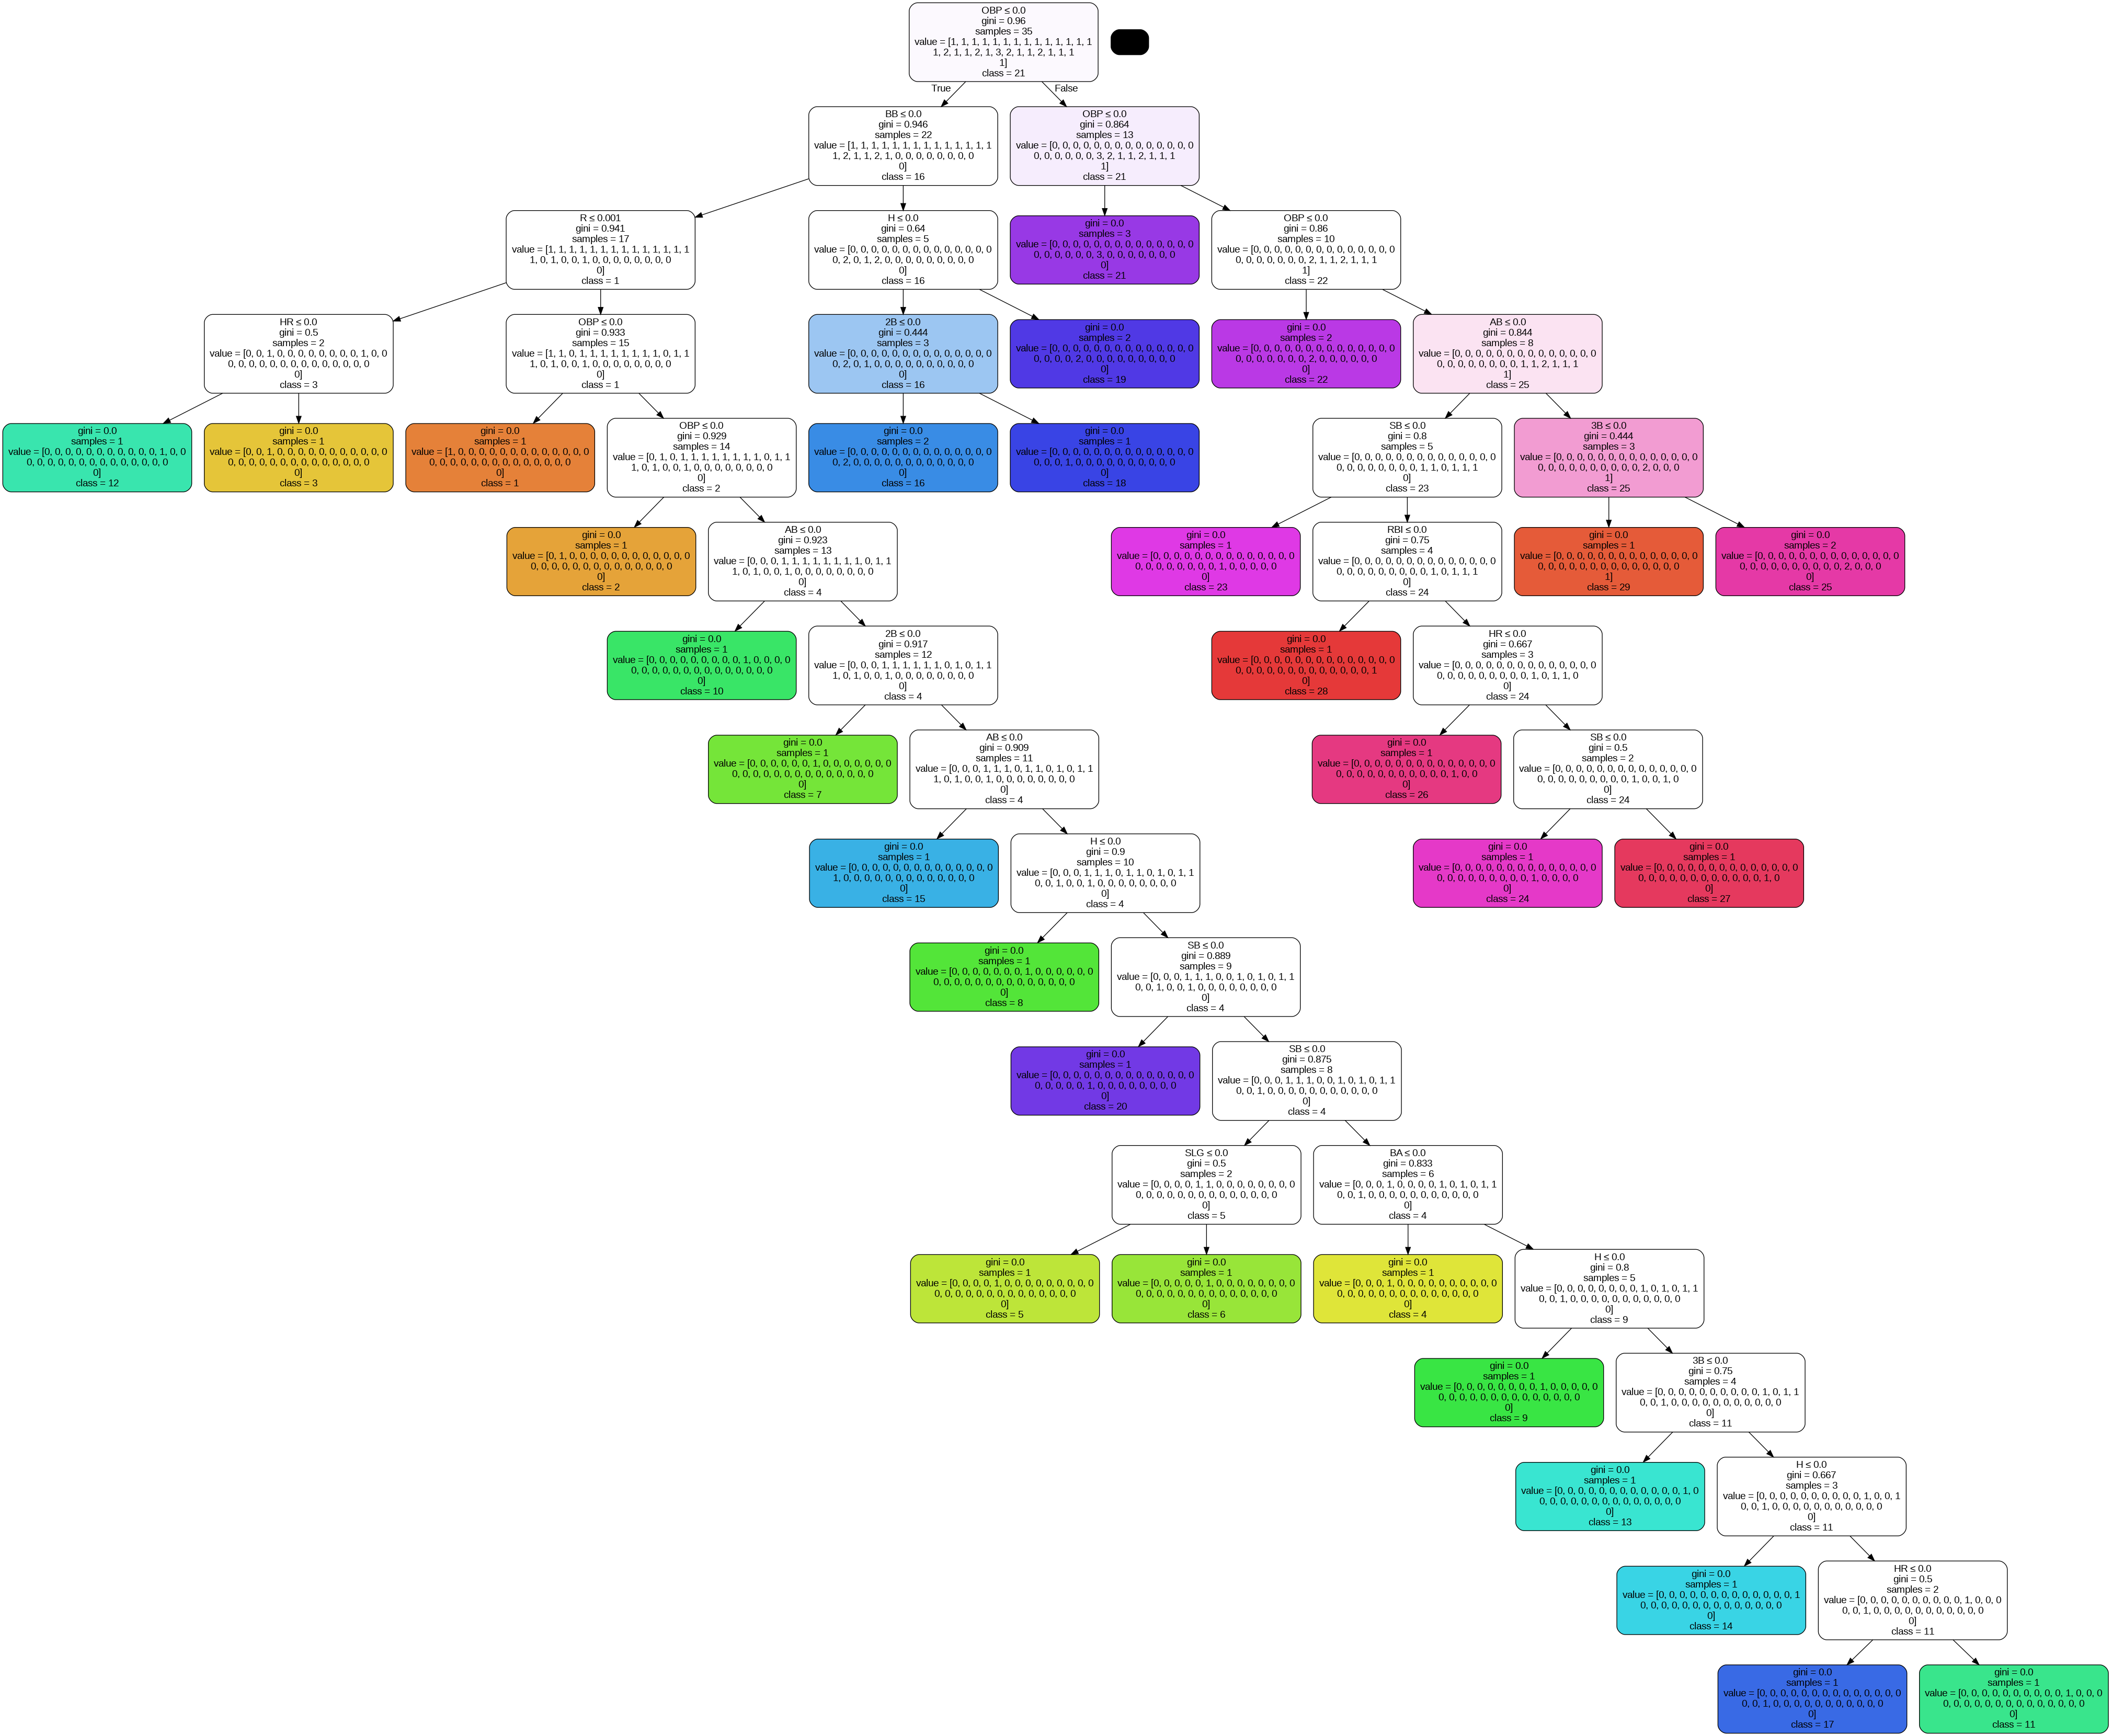

In [35]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=class_names)  # Use player names as class labels

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())